# EDS 220 Fall 2022
# Visualizing histograms and kernel density estimates: 1D data

In previous exercises, we worked with time series data to determine how to best read in data and clean up missing data/outliers.

Now let's practice building some visualizations of data _distributions_: namely, histogram and kernel density estimate-based plots of the data's probability distribution function.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

### 1) Read in data using Pandas

We'll use the same precipitation data that we worked with in the `Precipitation_QCexample_BoulderCO` notebook. This data comes from the [NOAA Climate Data Online](https://www.ncdc.noaa.gov/cdo-web/) service, and has been downloaded into the class repository (`Precip_BoulderCO_COOPstation.csv`). This file contains hourly precipitation averages calculated from a weather station in Boulder, and will be read in using Pandas:

In [40]:
# Read in data file into a Pandas data frame, flagging missing values as NaN
dat = pd.read_csv('805325-precip-daily-2003-2013.csv', na_values = [999.99])

The contents of the data frame can be displayed using the `.head()` command. Additionally, information on the associated _metadata_ is available in the class repository:

PRECIP_HLY_documentation.pdf

In [41]:
# Display header information for Pandas DataFrame
dat.head()
dat.tail()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
1835,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,20131222 01:00,NaN,[,
1836,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,20131223 00:00,NaN,],
1837,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,20131223 02:00,0.1,,
1838,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,20131229 01:00,NaN,[,
1839,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,20131231 00:00,NaN,],


### 2) Create histogram using Matplotlib

There are several ways to create histograms in Python. One simple way is using Matplotlib; this is actually a wrapper around the Numpy histogram function, which operates under the hood.

   More details on Matplotlib histograms can be found here:
  [https://matplotlib.org/stable/gallery/statistics/hist.html](https://matplotlib.org/stable/gallery/statistics/hist.html)
  

The basic generation of the histogram is done using `plt.hist` where Matplotlib.pyplot has been imported as `plt`.

In Matplotlib, the histogram function produces several different outputs, which I'll name as follows:
* n: the count of values within each bin
* bins: the edges of each bin
* patches: an "object" referring to the histogram bars, which you can edit to alter the appearance of the plot

Let's make a histogram of the "HPCP" field in the data frame above, using automatically generated bins:

Text(0.5, 1.0, 'precipitation histogram with matplotlib')

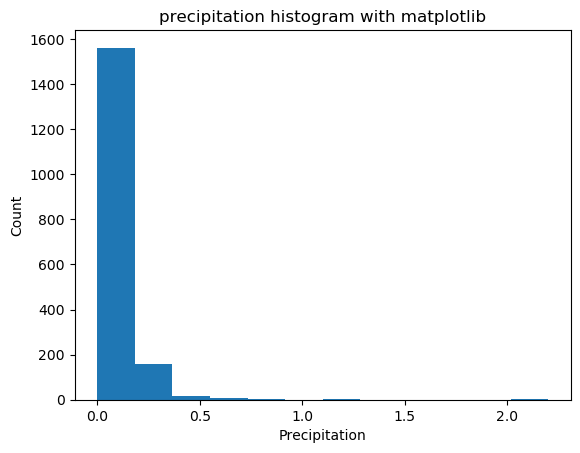

In [42]:
# Create histogram plot using Matplotlib
#set three variables, n, bins, and patches
n, bins, patches = plt.hist(x = dat['HPCP'], bins='auto')

# Label plot axes
plt.xlabel('Precipitation')
plt.ylabel('Count')
plt.title("precipitation histogram with matplotlib")

You'll see that most of the precipitation data is below 1 inch; we can get a better view by either
- changing the x-limit of the plot
- or changing the specification of the bins

Let's try the latter! The Numpy `linspace` function is useful in this context, since it's an easy way to generate linearly spaced values over a certain range.

Text(0.5, 1.0, 'precipitation histogram with matplotlib')

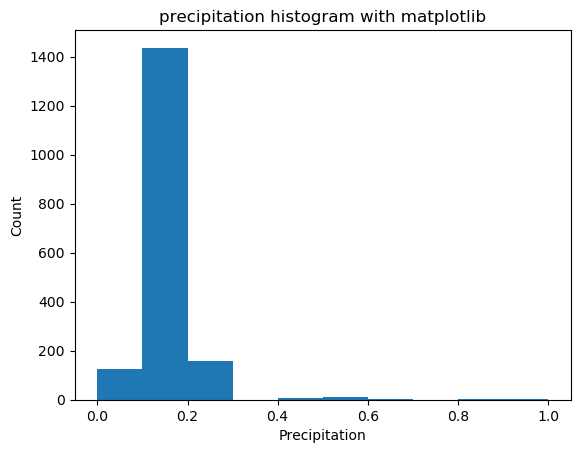

In [50]:
# Specify bins
#linspace takes min, max, number of bins and creates sequence
precipbins = np.linspace(0, 1, 11)
#11 includes the endpoint so returns ten even bins

# Re-create histogram plot
#will run without specifying the n bins patches arguments, but this stores them so you can call them later
n, bins, patches = plt.hist(x = dat['HPCP'], bins = precipbins)

# Label plot axes
plt.xlabel('Precipitation')
plt.ylabel('Count')
plt.title("precipitation histogram with matplotlib")

Oftentimes when working with histograms, we don't care about the absolute number of occurrences within a particular bin. Instead, the _proportion_ of data falling into different bins is more useful. To convert the histogram from an absolute count to a fraction, use the `density` argument to hist:

Text(0.5, 1.0, 'Normalized precipitation histogram')

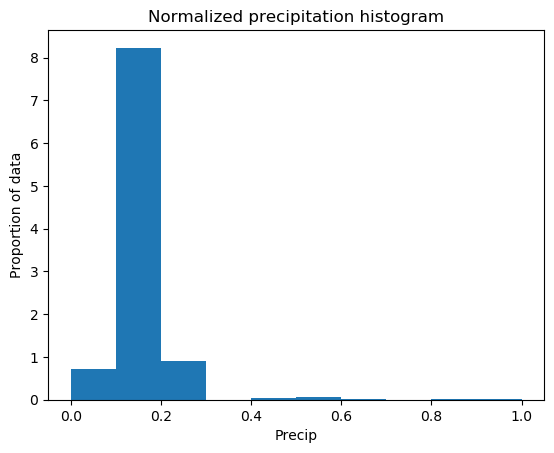

In [44]:
# Re-create histogram plot
plt.hist(x = dat['HPCP'], bins = precipbins, density = True)

# Label plot axes
plt.xlabel('Precip')
plt.ylabel('Proportion of data')
plt.title('Normalized precipitation histogram')

#bars represent the percent of data contained in the bins - so TOTAL bin height x bin width = 1


In this new, normalized histogram, the sum of the bar areas will equal 100%.

### 3) Kernel Density Estimation with Scipy

The examples above give a good sense for the data distribution, but are limited by the need to specify either the number of bins or the values associated with bin edges. Using the kernel density estimator functionality available in Scipy, we can get a continuous estimate of the distribution which has a smoother appearance.

The `gaussian_kde` function in Scipy will be used here; note that in order for this to work, we have to exclude all the NA values, otherwise the code will crash. This can be done using the `.dropna()` functionality in Pandas:

Text(0.5, 1.0, 'PDF of precipitation')

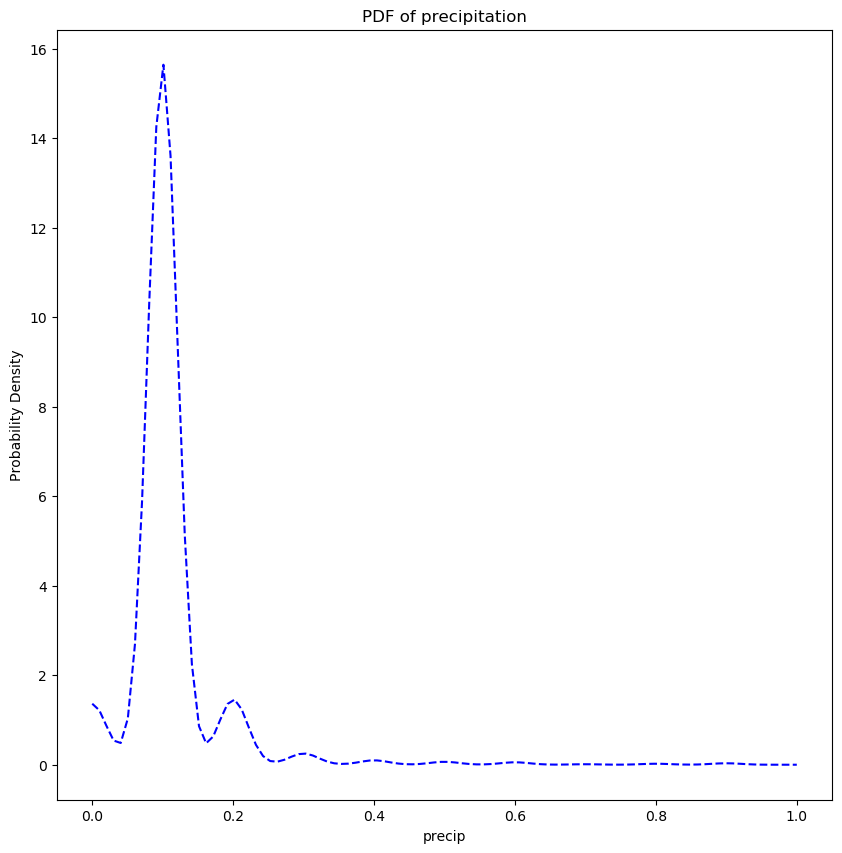

In [58]:
# Perform kernel density estimation on hourly precipitation values

kde = stats.gaussian_kde(dat['HPCP'].dropna())

#make more bins
pbins = np.linspace(0, 1, 100)

# Display plot of the distribution

fig = plt.figure(figsize = (10,10))
plt.plot(pbins, kde(pbins), 'b--')
plt.xlabel('precip')
plt.ylabel('Probability Density')
plt.title('PDF of precipitation')
